# **Лабораторная работа №1**

Найдите временной ряд с ценами активов (цены акций, облигаций, нефти, криптовалюты и т.д.)

Отобразите временной ряд на графике

Оцените его

Сделайте начальные выводы

Постройте 4 скользящие средние с окнами (5, 10, 30, 50)

Оцените график с скоьзящими среднмии

Сделайте предыдыдущие 2 пункта с экспоненциальными скользящими средними

Сделайте прогноз движения актива на основе экспоненциального скользящего среднего на 5 периодов вперед.

Сделайте выводы по проделанной работе и опипшите их.

In [1]:
!pip install yfinance matplotlib pandas numpy

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     ----------- ---------------------------- 262.1/948.2 kB ? eta -:--:--
     -------------------------------------- 948.2/948.2 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139064 sha256=40551a3c2df4352bce6149978f84b4b3f0aac933299ddaf74ceca872c1c505b6
  Stored in directory: c:\users\qqubs\appdata\local\pip\cache\wheels\8f\65\34\456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


[*********************100%***********************]  1 of 1 completed


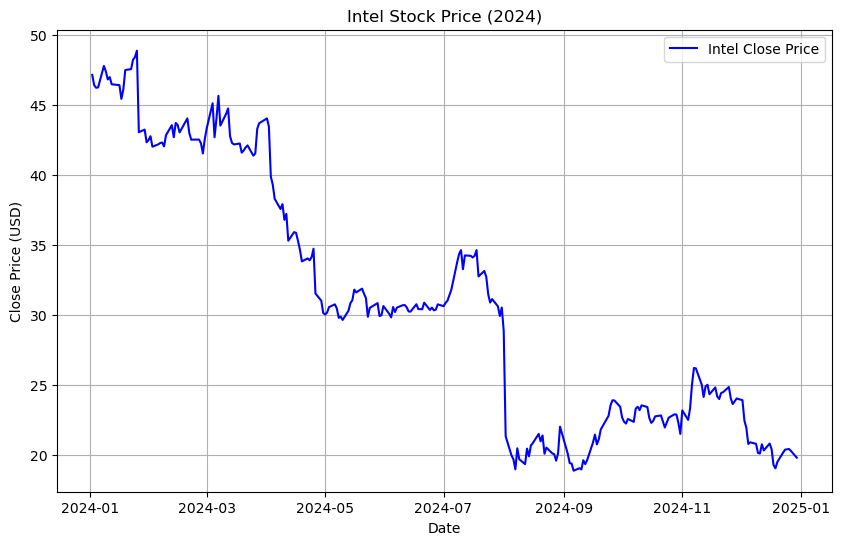

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# Загрузка данных о цене акций Intel за последний год
intel = yf.download('INTC', start='2024-01-01', end='2024-12-31')

# Отображение временного ряда на графике
plt.figure(figsize=(10, 6))
plt.plot(intel['Close'], label='Intel Close Price', color='blue')
plt.title('Intel Stock Price (2024)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

В 2024 году акции Intel Corporation продемонстрировали значительное снижение стоимости. 
В начале года цена акций составляла около 50 USD. 
К концу декабря 2024 года стоимость акций снизилась примерно до 20 USD.

Январь: Акции Intel начали год на уровне около 50 USD. Однако акции упали на 13%, закрыв месяц в районе 43 USD.

Февраль - март: Акции колебались в диапазоне 40–45 USD.

Август: Резкое падение акций почти на 20%.

Сентябрь - Декабрь: Кратковременный рост акций на 12,5% до показателя 26 USD.

Волатильность:
В течение 2024 года акции Intel демонстрировали высокую волатильность, с резкими колебаниями цен. Общий тренд оставался нисходящим.

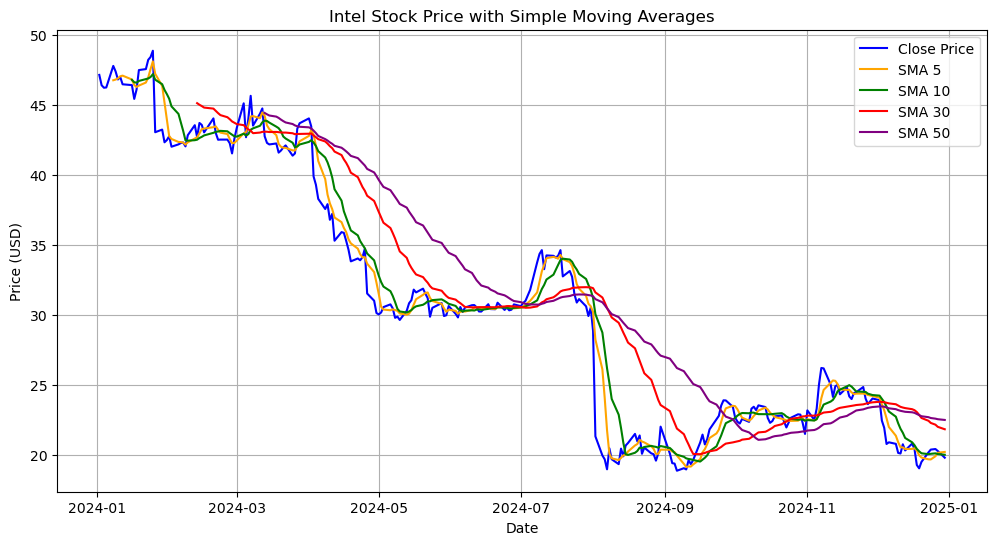

In [15]:
# Рассчитываем скользящие средние
intel['SMA_5'] = intel['Close'].rolling(window=5).mean()
intel['SMA_10'] = intel['Close'].rolling(window=10).mean()
intel['SMA_30'] = intel['Close'].rolling(window=30).mean()
intel['SMA_50'] = intel['Close'].rolling(window=50).mean()

# Построение графика с скользящими средними
plt.figure(figsize=(12, 6))
plt.plot(intel['Close'], label='Close Price', color='blue')
plt.plot(intel['SMA_5'], label='SMA 5', color='orange')
plt.plot(intel['SMA_10'], label='SMA 10', color='green')
plt.plot(intel['SMA_30'], label='SMA 30', color='red')
plt.plot(intel['SMA_50'], label='SMA 50', color='purple')

plt.title('Intel Stock Price with Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

Цена акций Intel имеет нисходящий тренд на протяжении года. В начале 2024 года цена стартует около 50 USD, а к концу года достигает отметки около 20 USD, что говорит о значительном падении стоимости акций.

SMA 5 и SMA 10: Эти линии следуют за ценой акций достаточно близко, улавливая краткосрочные колебания.
В участках, где цена акций резко меняется (например, летний обвал в июле – августе), эти линии пересекаются с графиком цены, демонстрируя временные изменения тренда.

SMA 30 и SMA 50: Более сглаженные линии, отражающие долгосрочный тренд.
С самого начала года эти скользящие средние имеют нисходящий наклон.
Во второй половине года SMA 30 и SMA 50 действуют как сопротивление для цены, показывая неспособность цены вернуться к предыдущим уровням.

Долгосрочный тренд: Падение стоимости акций подтверждается нисходящими SMA 30 и SMA 50.
Краткосрочные колебания: Пересечения SMA 5 и 10 с ценой акций сигнализируют о кратковременных изменениях тренда, но в большинстве случаев это не приводит к развороту долгосрочного тренда.

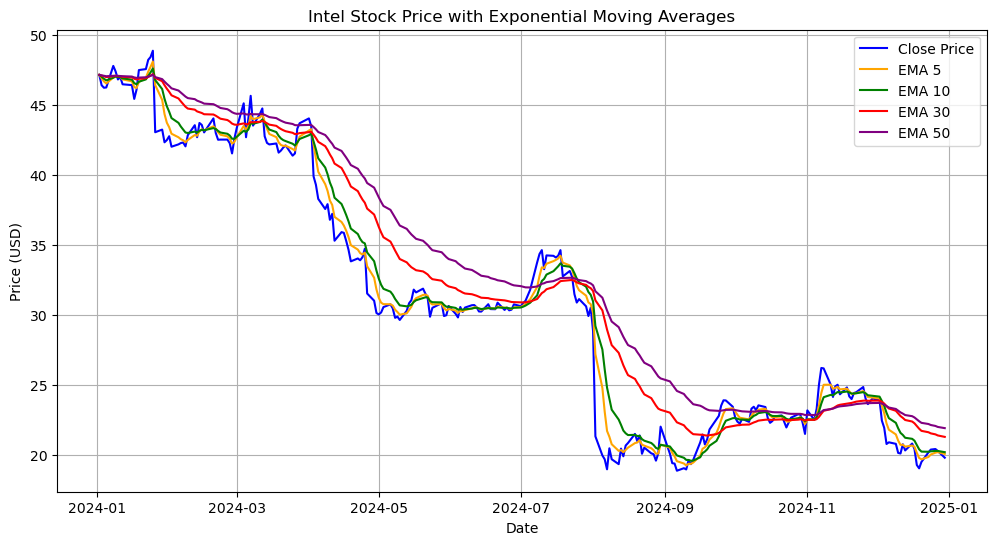

In [18]:
# Рассчитываем экспоненциальные скользящие средние
intel['EMA_5'] = intel['Close'].ewm(span=5, adjust=False).mean()
intel['EMA_10'] = intel['Close'].ewm(span=10, adjust=False).mean()
intel['EMA_30'] = intel['Close'].ewm(span=30, adjust=False).mean()
intel['EMA_50'] = intel['Close'].ewm(span=50, adjust=False).mean()

# Построение графика с экспоненциальными скользящими средними
plt.figure(figsize=(12, 6))
plt.plot(intel['Close'], label='Close Price', color='blue')
plt.plot(intel['EMA_5'], label='EMA 5', color='orange')
plt.plot(intel['EMA_10'], label='EMA 10', color='green')
plt.plot(intel['EMA_30'], label='EMA 30', color='red')
plt.plot(intel['EMA_50'], label='EMA 50', color='purple')

plt.title('Intel Stock Price with Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

EMA 5 и EMA 10: Эти линии реагируют быстрее на изменения цены, что позволяет хорошо отслеживать краткосрочные колебания.
На графике видно, что EMA 5 и EMA 10 пересекают цену вверх и вниз в момент краткосрочных разворотов тренда.

EMA 30 и EMA 50: Эти линии более плавные, что позволяет увидеть долгосрочные тенденции.
Снижение этих линий на протяжении всего года подтверждает медвежий тренд.
Во второй половине года EMA 30 и EMA 50 часто оказываются выше цены, играя роль сопротивления.

Долгосрочный тренд:
Нисходящее направление EMA 30 и EMA 50 подтверждает общий медвежий тренд на протяжении года.

Краткосрочные колебания:
EMA 5 и EMA 10 успешно отслеживают кратковременные изменения в тренде, что может быть полезно для внутридневной торговли.

Сигналы для разворота:
Пока EMA 5 и EMA 10 не начинают пересекать EMA 30 и EMA 50 снизу вверх, говорить о развороте тренда рано.

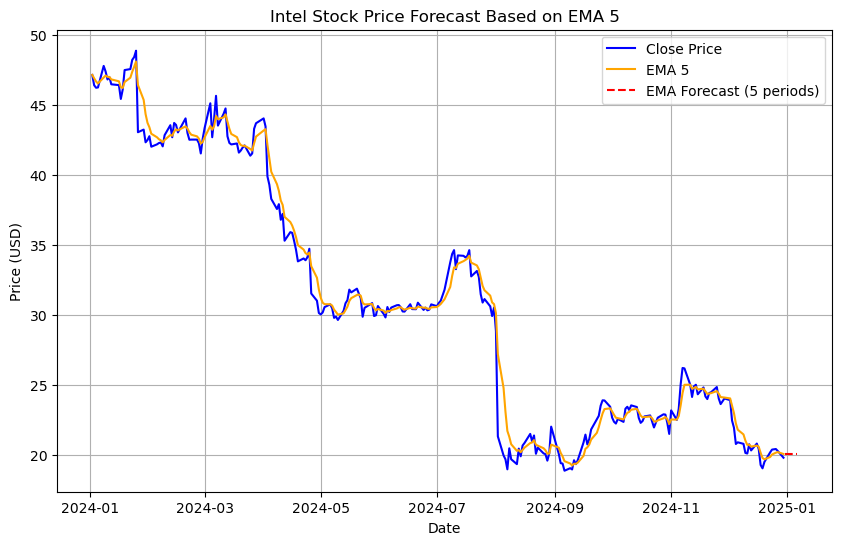

In [23]:
import pandas as pd

# Создаем прогноз на основе последнего значения EMA 5
last_ema = intel['EMA_5'].iloc[-1]

forecast_periods = 5
forecast = [last_ema] * forecast_periods

# Создаем даты для прогноза
forecast_dates = pd.date_range(start=intel.index[-1], periods=forecast_periods + 1, freq='B')[1:]

# Построение прогноза
plt.figure(figsize=(10, 6))
plt.plot(intel['Close'], label='Close Price', color='blue')
plt.plot(intel['EMA_5'], label='EMA 5', color='orange')
plt.plot(forecast_dates, forecast, label='EMA Forecast (5 periods)', linestyle='--', color='red')

plt.title('Intel Stock Price Forecast Based on EMA 5')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

Close price: Отображает исторические значения цены акций Intel на протяжении всего рассматриваемого периода.

EMA 5: EMA 5 реагирует на изменения цены более быстро, чем долгосрочные скользящие средние, поскольку придает больший вес последним значениям. Это позволяет выявить краткосрочные тренды и колебания цены.

EMA Forecast на 5 периодов вперед: Прогнозная линия EMA 5 (красная пунктирная) показывает ожидаемую динамику цены на ближайшие 5 периодов. Она основана на предположении, что текущая тенденция сохранится. Этот подход эффективен для краткосрочного анализа стабильных трендов, но менее точен при резких изменениях.

Исторические данные по цене акций демонстрируют общий нисходящий тренд на протяжении всего периода с некоторыми локальными колебаниями.
EMA 5 плавно повторяет движения цены, сглаживая краткосрочные колебания и позволяя более четко увидеть текущий тренд.
Прогноз EMA (5 периодов) строится на основе текущего значения EMA 5 и отображается в виде горизонтальной линии. Это указывает, что при сохранении текущей тенденции цена останется на стабильном уровне в ближайшие периоды.

Начальные выводы: Если текущий тренд сохранится, цена, вероятно, останется вблизи прогнозного уровня. Однако при резких изменениях цена может значительно отклониться от прогноза.

ВЫВОД: Проведенный анализ показал, что акции Intel в 2024 году демонстрировали общий нисходящий тренд, с локальными периодами стабилизации и краткосрочными колебаниями. Скользящие средние (как простые, так и экспоненциальные) помогли сгладить ценовые изменения и выявить общие тенденции.

Экспоненциальные скользящие средние (EMA) показали свою чувствительность к изменениям цены и хорошо отразили краткосрочные колебания, особенно EMA 5, которая быстро адаптируется к новым данным. Прогноз на основе EMA 5 предполагает, что при сохранении текущей динамики цена акций стабилизируется на уровне последнего значения в краткосрочной перспективе.

Использование методов анализа с применением скользящих средних позволяет выявлять сигналы для принятия торговых решений (покупка/продажа) и понимать как долгосрочные, так и краткосрочные тренды. Однако прогнозы на основе EMA эффективны только в стабильных рыночных условиях и требуют дополнительной оценки для учета резких изменений или влияния внешних факторов.